In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('setup complete')

setup complete


In [2]:
df = pd.read_csv('SalesForCourse_quizz_table.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [3]:
df.shape

(34867, 16)

In [4]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop('Column1',axis=1)

In [8]:
df['Margin'] = df['Revenue'] - df['Cost']

In [9]:
df['Unit_Margin'] = df['Unit Price'] - df['Unit Cost']

In [10]:
df_france = df.loc[df.Country == 'France']
df_United_Kingdom = df.loc[df.Country == 'United Kingdom']
df_Germany = df.loc[df.Country == 'Germany']
df_United_States = df.loc[df.Country == 'United States']

In [11]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Margin,Unit_Margin
312,312,01/11/16,2016.0,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0,669.0,223.0
313,313,01/11/16,2016.0,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0,13.0,6.5
314,314,01/18/16,2016.0,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0,703.0,351.5
315,315,01/18/16,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0,64.0,32.0
316,316,01/18/16,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0,27.0,27.0


In [12]:
df.shape

(2574, 17)

In [13]:
df.Country.unique()

array(['France', 'United Kingdom', 'Germany', 'United States'],
      dtype=object)

Text(0.5, 1.0, 'Revenue per country')

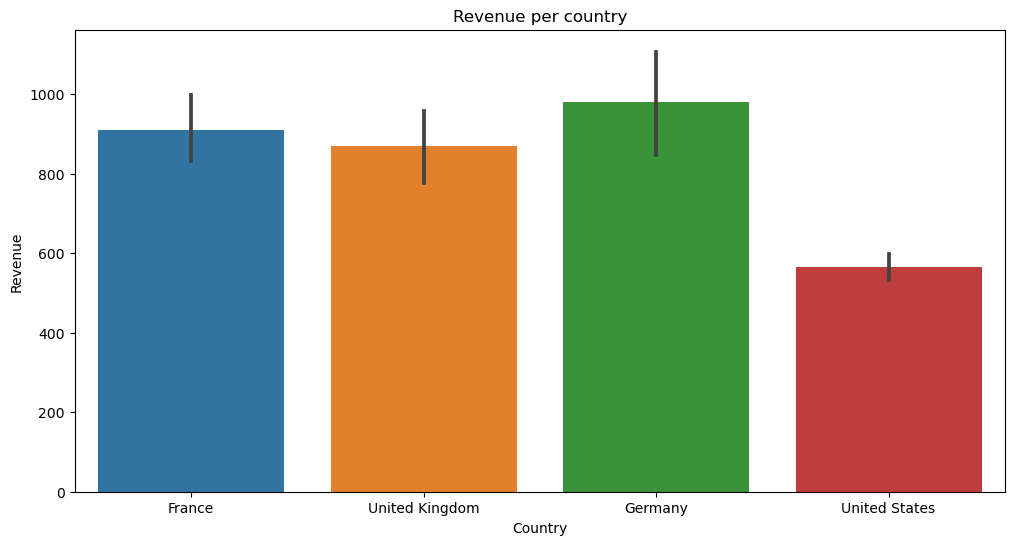

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.Country,y=df['Revenue'])
plt.title('Revenue per country')

Text(0.5, 1.0, 'Margin per country')

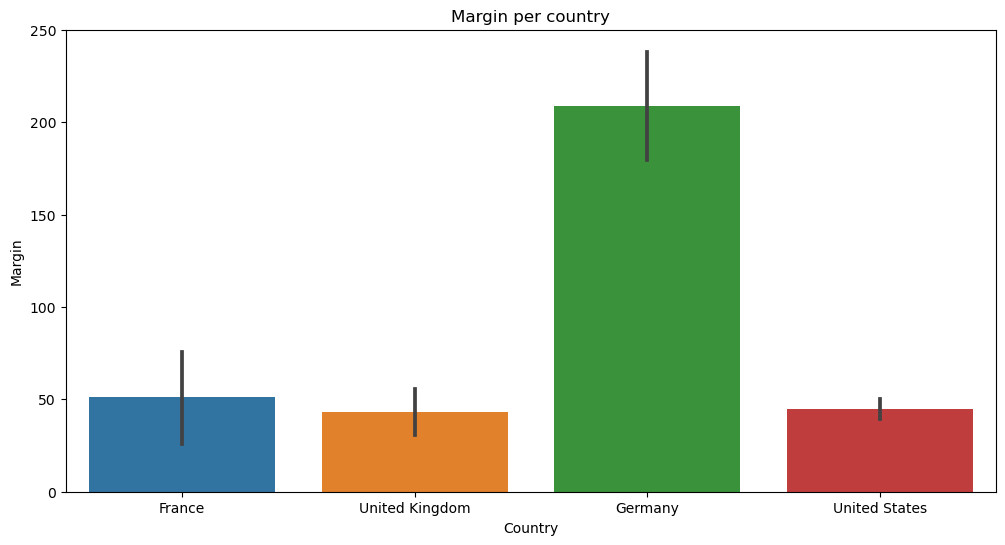

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.Country,y=df['Margin'])
plt.title('Margin per country')

<AxesSubplot: title={'center': 'france: sales per product category'}, ylabel='Product Category'>

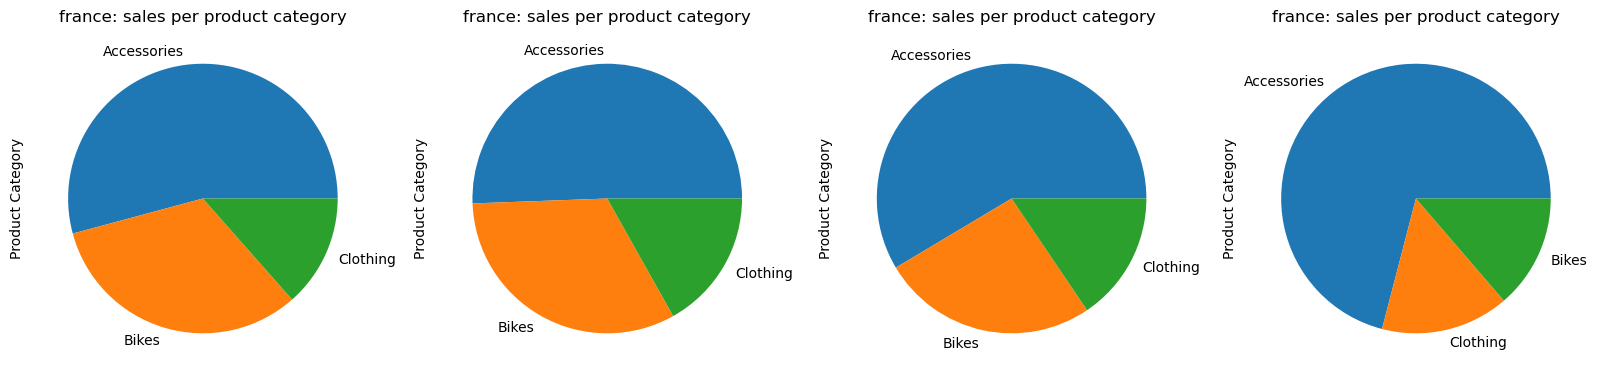

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(1,4,1)
plt.title('france: sales per product category')
df[df['Country']=='France']['Product Category'].value_counts().plot(kind='pie')

plt.subplot(1,4,2)
plt.title('france: sales per product category')
df[df['Country']=='United Kingdom']['Product Category'].value_counts().plot(kind='pie')

plt.subplot(1,4,3)
plt.title('france: sales per product category')
df[df['Country']=='Germany']['Product Category'].value_counts().plot(kind='pie')

plt.subplot(1,4,4)
plt.title('france: sales per product category')
df[df['Country']=='United States']['Product Category'].value_counts().plot(kind='pie')

<AxesSubplot: title={'center': 'United Kingdom: Sales per Sub Category '}, ylabel='Sub Category'>

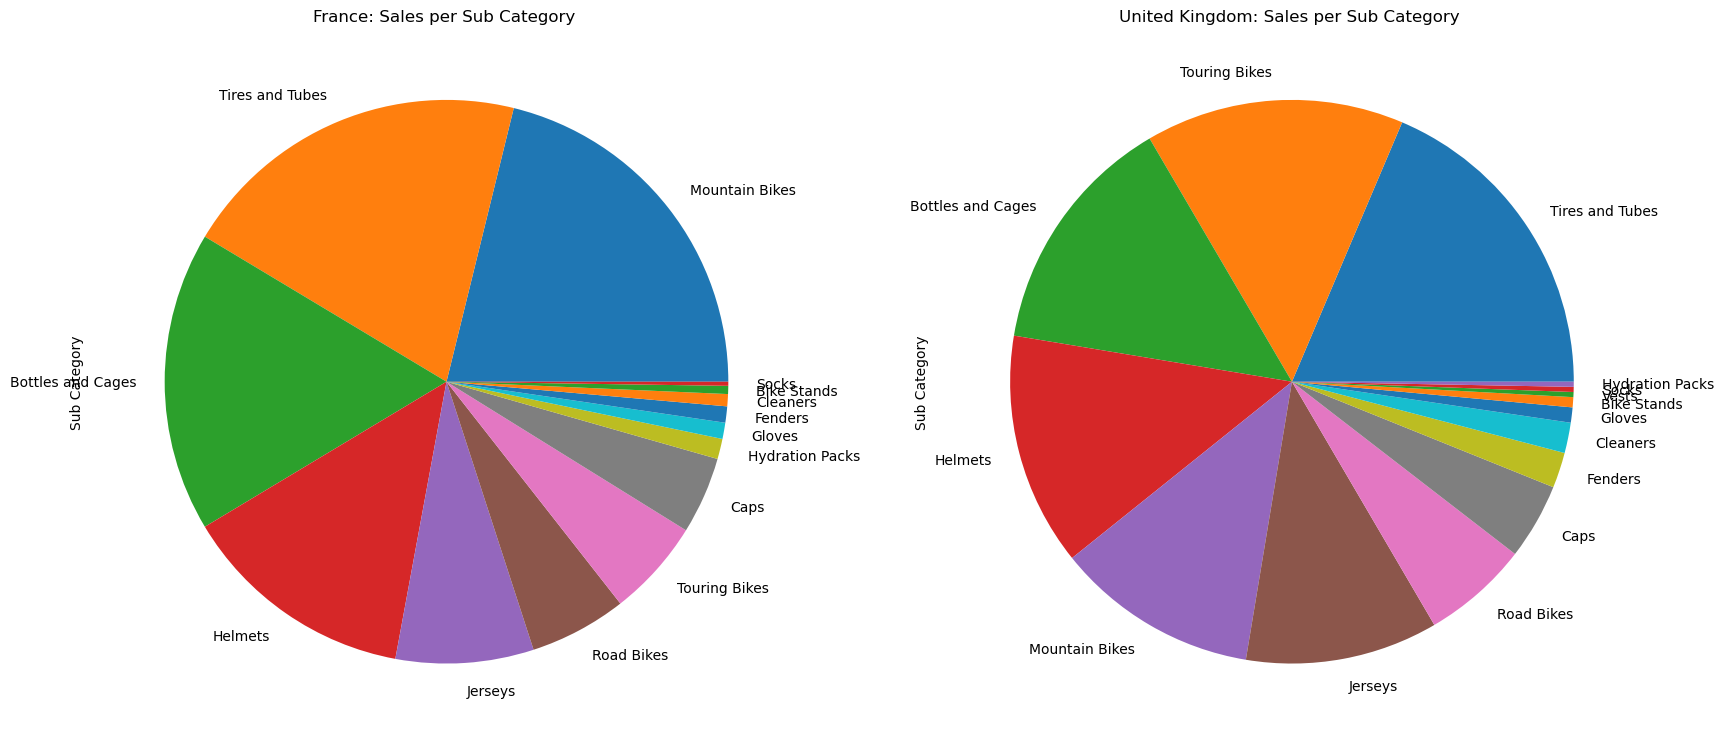

In [17]:
plt.figure(figsize = (20,20))

plt.subplot(1,2,1)
plt.title("France: Sales per Sub Category ")
df[df['Country'] == 'France']['Sub Category'].value_counts().plot(kind='pie')


plt.subplot(1,2,2)
plt.title("United Kingdom: Sales per Sub Category ")
df[df['Country'] == 'United Kingdom']['Sub Category'].value_counts().plot(kind= 'pie')

<AxesSubplot: title={'center': 'Unitd States: Sales per Sub Category '}, ylabel='Sub Category'>

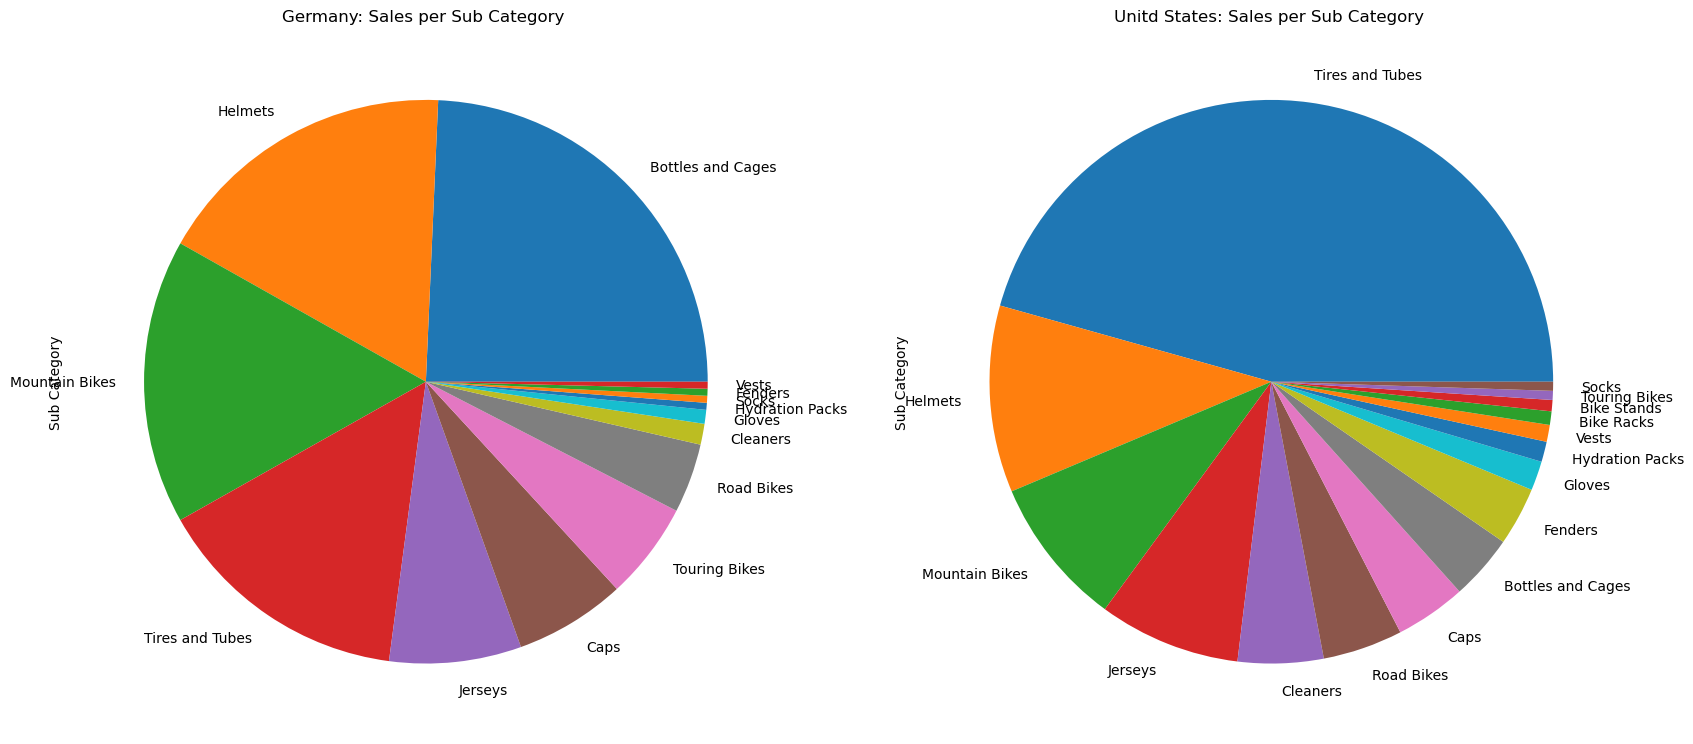

In [18]:
plt.figure(figsize = (20,20))

plt.subplot(1,2,1)
plt.title("Germany: Sales per Sub Category ")
df[df['Country'] == 'Germany']['Sub Category'].value_counts().plot(kind='pie')

plt.subplot(1,2,2)
plt.title("Unitd States: Sales per Sub Category ")
df[df['Country'] == 'United States']['Sub Category'].value_counts().plot(kind='pie')

<AxesSubplot: title={'center': 'United States: Product Category Margin'}, xlabel='Product Category', ylabel='Margin'>

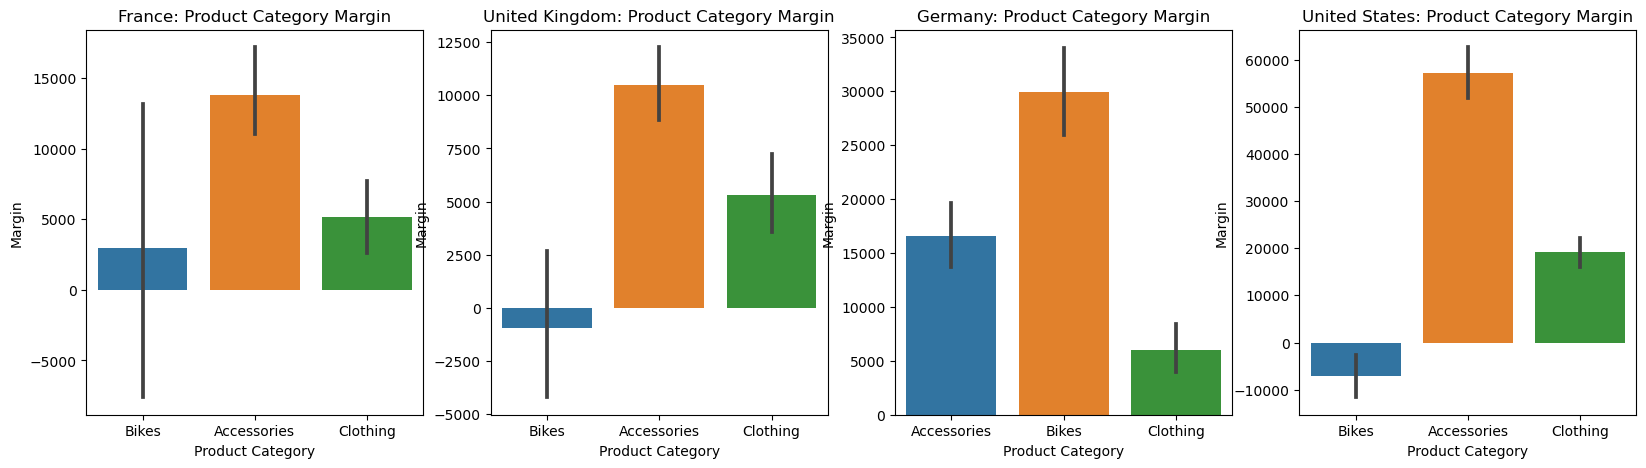

In [19]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.title("France: Product Category Margin")
sns.barplot(x=df_france['Product Category'], y=df_france['Margin'],estimator=sum)

plt.subplot(1,4,2)
plt.title("United Kingdom: Product Category Margin")
sns.barplot(x=df_United_Kingdom['Product Category'], y=df_United_Kingdom['Margin'],estimator=sum)

plt.subplot(1,4,3)
plt.title("Germany: Product Category Margin")
sns.barplot(x=df_Germany['Product Category'], y=df_Germany['Margin'],estimator=sum)

plt.subplot(1,4,4)
plt.title("United States: Product Category Margin")
sns.barplot(x=df_United_States['Product Category'], y=df_United_States['Margin'],estimator=sum)

<AxesSubplot: title={'center': 'United Kingdom: Ages of Customers'}>

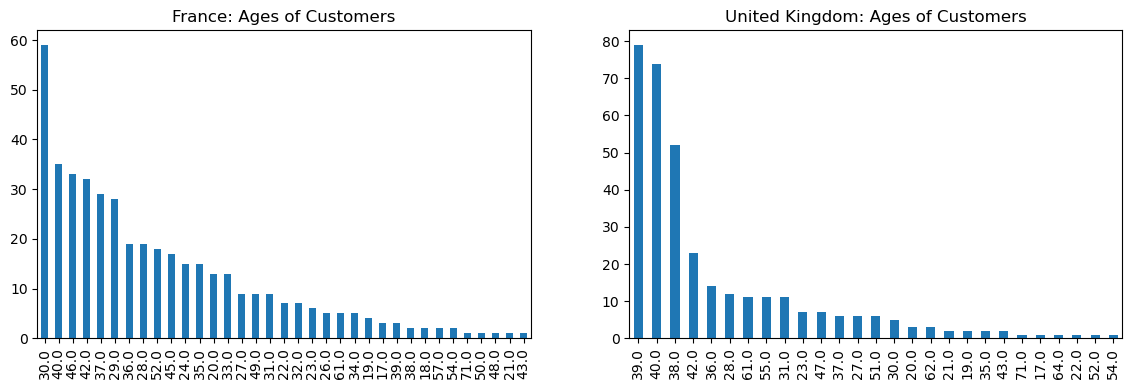

In [20]:
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.title("France: Ages of Customers")
df[df['Country'] == 'France']['Customer Age'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("United Kingdom: Ages of Customers")
df[df['Country'] == 'United Kingdom']['Customer Age'].value_counts().plot(kind='bar')

<AxesSubplot: title={'center': 'Unitd States: Ages of Customers'}>

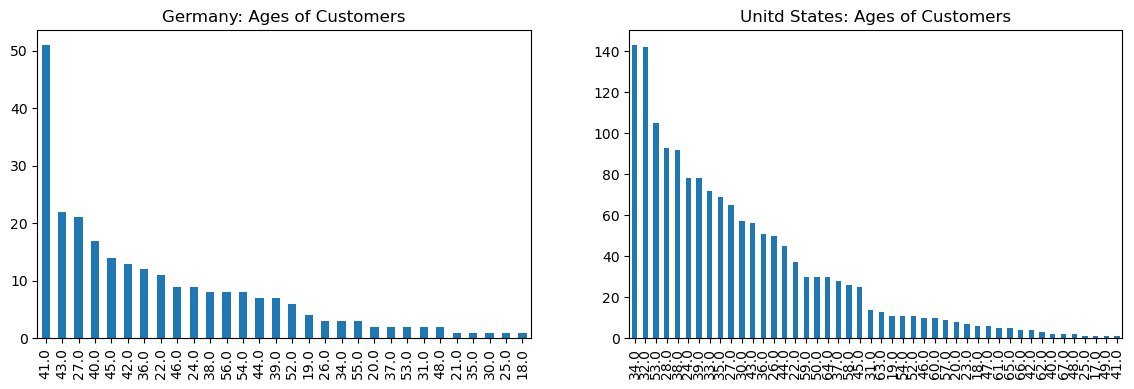

In [21]:
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.title("Germany: Ages of Customers")
df[df['Country'] == 'Germany']['Customer Age'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Unitd States: Ages of Customers")
df[df['Country'] == 'United States']['Customer Age'].value_counts().plot(kind='bar')